The functions in this notebook are part of the Indian music processing library under development in the [DAP Lab at IIT Bombay](https://www.ee.iitb.ac.in/course/~daplab/publications/index.html). 

The following external libraries are utilised: 
1. matplotlib
2. pandas
3. scipy
4. praat-parselmouth
5. librosa

### Add data from google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### Store the location of the ODF folder

In [2]:
data_path = '/content/gdrive/My Drive/srijan_collab_files/' # Add the path of the collab_files folder

### Install dependencies

In [3]:
!pip install -r /content/gdrive/My\ Drive/srijan_collab_files/env.txt

In [4]:
import sys
sys.path.append(data_path)
from utils import *
import librosa
import pandas as pd
import json

### Read metadata file

In [5]:
f = open(data_path + 'metadata.json')
metadata = json.load(f) # metadata contains raga specific info like the note labels, tonic of singer etc.

In [6]:
# update audio path to have the location to the drive folder
metadata['vocal_audio_path'] = data_path + metadata['vocal_audio_path']

In [7]:
# view metadata present in the file
metadata

{'max_pitch': 632.28,
 'min_pitch': 158.07,
 'notes': [{'cents': -500, 'label': 'P_'},
  {'cents': -400, 'label': 'd_'},
  {'cents': -100, 'label': 'N_'},
  {'cents': 0, 'label': 'S'},
  {'cents': 100, 'label': 'r'},
  {'cents': 300, 'label': 'g'},
  {'cents': 600, 'label': 'M'},
  {'cents': 700, 'label': 'P'},
  {'cents': 800, 'label': 'd'},
  {'cents': 1100, 'label': 'N'},
  {'cents': 1200, 'label': "S'"},
  {'cents': 1300, 'label': "r'"},
  {'cents': 1500, 'label': "g'"},
  {'cents': 1800, 'label': "M'"},
  {'cents': 1900, 'label': "P'"}],
 'tonic': 211,
 'vocal_audio_path': '/content/gdrive/My Drive/srijan_collab_files/2-2-1-1-GarvaMaisanLagi.mp3'}

### Initialise and populate the figure

In [8]:
%%capture
# initialise figure, with 3 subplots
fig, axs = generateFig(4, (28, 10), [4, 5, 3, 4])

In [9]:
# plot waveplot
axs[0] = drawWave(audioPath=metadata['vocal_audio_path'], 
                  ax=axs[0], 
                  annotate=False)

# plot pitch contour
axs[1] = pitchContour(audioPath=metadata['vocal_audio_path'], 
                       minPitch=metadata['min_pitch'], 
                       maxPitch=metadata['max_pitch'], 
                       notes=metadata['notes'], 
                       tonic=metadata['tonic'], 
                       ax=axs[1], 
                       annotate=False)


# plot spetogram 2
axs[2] = spectrogram(audioPath=metadata['vocal_audio_path'], 
                     cmap='Blues', 
                     ax=axs[2], 
                     annotate=False)

axs[3] = energyContour(audioPath=metadata['vocal_audio_path'], 
                      sr=16000,
                      winSize=640,
                      hopSize=160,
                      nFFT=1024,
                      ax=axs[3],
                      xlabel=True,
                      xticks=True
                      )


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


### Play the audio being analysed and view the figure

In [10]:
playAudio(audioPath=metadata['vocal_audio_path'])

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


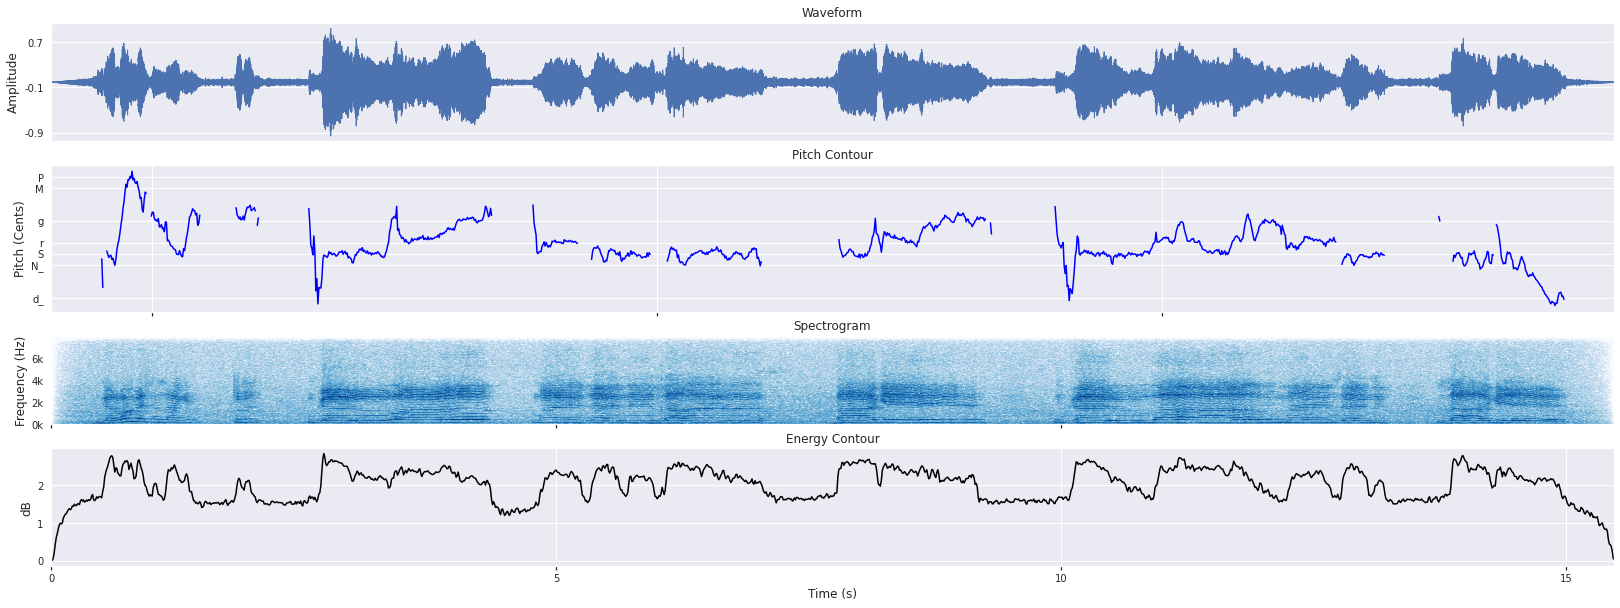

In [11]:
fig